In [2]:
include("ready.jl")

complete initialization


In [17]:
β_controller = PID(Kp=1.0, Ki=0.0006, Kd=50.0, sign=1)
R_controller = PID(Kp=5.0, Ki=0.05, Kd=5.0, sign=-1)
phase = 1
t1 = 0
t12 = 0

reference.R_ref = 1.0
reference.β_ref = -1.35


function control_fn!(i, state, input, exstate, reference)

    β = exstate.β
    R = exstate.R
    R_ref = reference.R_ref
    β_ref = reference.β_ref
    R_l1ac = reference.R_l1ac
    
    δ_ff = 0.11416234991268712
    ω_ff = 5.034674237738346
    ω0 = input.ω
    
    err = round_angle(β - β_ref)
    δ = clamp(δ_ff + controla!(β_controller, err), 0, π / 8)
    
    if i % 10 == 0
        
        if i > 100
            R_l1ac = L1AC!(l1ac, convert(Float64,R_ref), est_circle.r, 0.10)
            reference.R_l1ac = R_l1ac
            err = R - R_ref
            ω0 = clamp(ω_ff + controla!(R_controller,err),3,7)
        else
            err = R - R_ref
            ω0 = clamp(ω_ff + controla!(R_controller,err),3,7)
        end
    end
    ω = ω0
    return δ, ω
end

function reset_fn()
    β_controller.err_sum = 0
    β_controller.last_err = 0
    R_controller.err_sum = 0
    R_controller.last_err = 0
    phase = 1
end

reset_fn (generic function with 1 method)

In [18]:
init_node("Controller", disable_signals=true)
sub1 = Subscriber{RosMsg.PoseStamped}("/vrpn_client_node/racecar/pose", update_rts, queue_size=1)
sub2 = Subscriber{RosMsg.Imu}("/imu", update_imu, queue_size=1)
sub3 = Subscriber{RosMsg.BoolMsg}("/Safe", update_safe, queue_size=1)
pub = Publisher{RosMsg.VescCtrlStamped}("/vesc/ctrl", queue_size=1)
data = control_wrapper(pub, control_fn!, reset_fn);

Interrupted


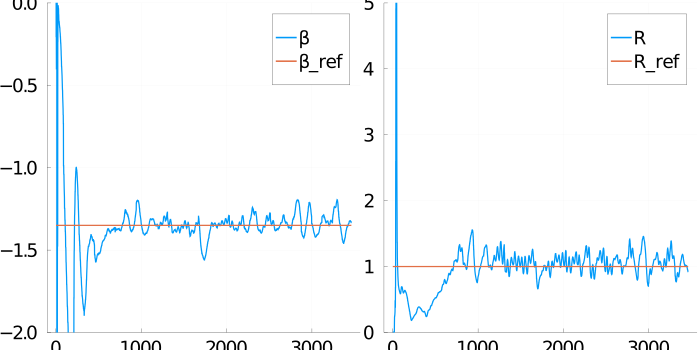

In [19]:
p1 = plot([p.es.β for p in data],label="β")
plot!(p1, [p.ref.β_ref for p in data],label="β_ref")
p2 = plot([p.es.R for p in data],label="R")
plot!(p2, [p.ref.R_ref for p in data],label="R_ref")
ylims!(p1,-2,0)
ylims!(p2,0,5)
plot(p1,p2,size = (2800, 1400),xtickfontsize=50,ytickfontsize=50,legendfontsize=50,width=5)

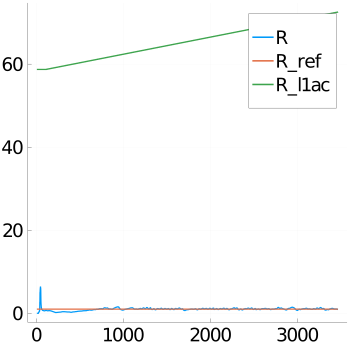

In [20]:
p3 = plot([p.es.R for p in data],label="R")
plot!(p3, [p.ref.R_ref for p in data],label="R_ref")
plot!(p3, [p.ref.R_l1ac for p in data],label="R_l1ac")

plot(p3,size = (1400, 1400),xtickfontsize=50,ytickfontsize=50,legendfontsize=50,width=5)

In [3]:
β_controller = PID(Kp=1.0, Ki=0.0006, Kd=50.0, sign=1)
R_controller = PID(Kp=5.0, Ki=0.05, Kd=5.0, sign=-1)
phase = 1
t1 = 0
t12 = 0

reference.R_ref = 1.0
reference.β_ref = -1.35


function control_fn!(i, state, input, exstate, reference)

    β = exstate.β
    R = exstate.R
    R_ref = reference.R_ref
    β_ref = reference.β_ref
    R_l1ac = reference.R_l1ac
    
    δ_ff = 0.11416234991268712
    ω_ff = 5.034674237738346
    ω0 = input.ω
    
    err = round_angle(β - β_ref)
    δ = clamp(δ_ff + controla!(β_controller, err), 0, π / 8)
    
    if i % 10 == 0
        
        if i > 100
            R_l1ac = L1AC!(l1ac, convert(Float64,R_ref), est_circle.r, 0.10)
            reference.R_l1ac = R_l1ac
            err = R - R_l1ac
            ω0 = clamp(ω_ff + controla!(R_controller,err),3,7)
        else
            err = R - R_ref
            ω0 = clamp(ω_ff + controla!(R_controller,err),3,7)
        end
    end
    ω = ω0
    return δ, ω
end

function reset_fn()
    β_controller.err_sum = 0
    β_controller.last_err = 0
    R_controller.err_sum = 0
    R_controller.last_err = 0
    phase = 1
end

reset_fn (generic function with 1 method)

In [4]:
init_node("Controller", disable_signals=true)
sub1 = Subscriber{RosMsg.PoseStamped}("/vrpn_client_node/racecar/pose", update_rts, queue_size=1)
sub2 = Subscriber{RosMsg.Imu}("/imu", update_imu, queue_size=1)
sub3 = Subscriber{RosMsg.BoolMsg}("/Safe", update_safe, queue_size=1)
pub = Publisher{RosMsg.VescCtrlStamped}("/vesc/ctrl", queue_size=1)
data = control_wrapper(pub, control_fn!, reset_fn);

Interrupted


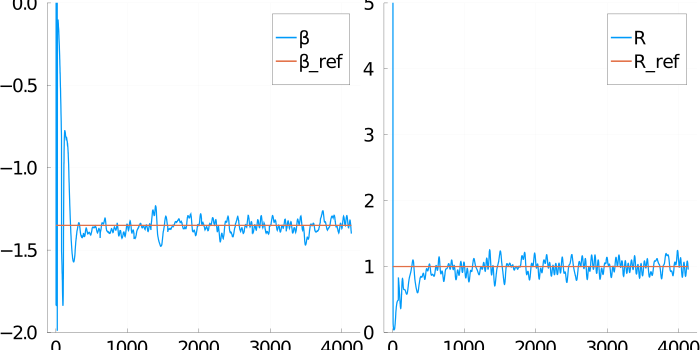

In [5]:
p1 = plot([p.es.β for p in data],label="β")
plot!(p1, [p.ref.β_ref for p in data],label="β_ref")
p2 = plot([p.es.R for p in data],label="R")
plot!(p2, [p.ref.R_ref for p in data],label="R_ref")
ylims!(p1,-2,0)
ylims!(p2,0,5)
plot(p1,p2,size = (2800, 1400),xtickfontsize=50,ytickfontsize=50,legendfontsize=50,width=5)

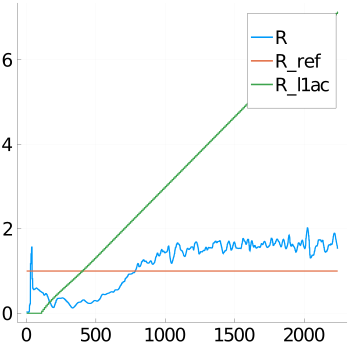

In [81]:
p3 = plot([p.es.R for p in data],label="R")
plot!(p3, [p.ref.R_ref for p in data],label="R_ref")
plot!(p3, [p.ref.R_l1ac for p in data],label="R_l1ac")

plot(p3,size = (1400, 1400),xtickfontsize=50,ytickfontsize=50,legendfontsize=50,width=5)

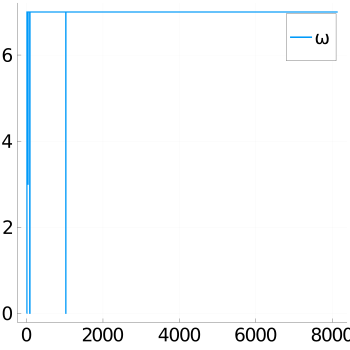

In [68]:
p5 = plot([p.u.ω for p in data],label="ω")
plot(p5,size = (1400, 1400),xtickfontsize=50,ytickfontsize=50,legendfontsize=50,width=5)

In [69]:
[p.u.ω for p in data[6000:8000]]

2001-element Vector{Float64}:
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 ⋮
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0
 7.0